# Setup

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sb
import numpy as np
import scipy

# Import Data

In [59]:
# Behavioral data from 184 Human Connectome Project subjects for whom there is 7T data. 
# I want to explore what's here to prepare for a meeting
df = pd.read_csv("unrestricted_wbreilly92_4_12_2018_18_54_55.csv")

# Take a Looksies

In [60]:
df.head()
# import looks like it worked fine. 383 columns!! 


Subject Release Acquisition Gender    Age  3T_Full_MR_Compl  T1_Count  \
0   100610    S900         Q08      M  26-30              True         2   
1   102311    S500         Q06      F  26-30              True         1   
2   102816      Q3         Q03      F  26-30              True         1   
3   104416    S900         Q09      F  31-35              True         2   
4   105923    MEG2         Q07      F  31-35              True         2   

   T2_Count  3T_RS-fMRI_Count  3T_RS-fMRI_PctCompl     ...      Noise_Comp  \
0         1                 4                100.0     ...             2.0   
1         1                 4                100.0     ...             4.4   
2         1                 4                100.0     ...             5.2   
3         2                 4                100.0     ...             2.8   
4         2                 4                100.0     ...             5.2   

   Odor_Unadj  Odor_AgeAdj  PainIntens_RawScore  PainInterf_Tscore  \
0      122.25       110.45                    0               38.6   
1      122.25       110.45                    1               52.2   
2      122.25       111.41                    1               52.6   
3      101.12        87.11                    0               38.6   
4      122.25       111.41                    0               38.6   

   Taste_Unadj  Taste_AgeAdj  Mars_Log_Score  Mars_Errs  Mars_Final  
0        84.84         85.31            1.92          1        1.88  
1        98.31         99.06            1.80          0        1.80  
2        98.31         97.68            1.72          1        1.68  
3        95.36         93.48            1.92          1        1.88  
4        97.26         96.41            1.88          1        1.84  

[5 rows x 383 columns]

In [61]:
len(df)
# 184 subjects, that's what I was hoping to find 

184

In [62]:
# what's here
list(df)

['Subject',
 'Release',
 'Acquisition',
 'Gender',
 'Age',
 '3T_Full_MR_Compl',
 'T1_Count',
 'T2_Count',
 '3T_RS-fMRI_Count',
 '3T_RS-fMRI_PctCompl',
 '3T_Full_Task_fMRI',
 '3T_tMRI_PctCompl',
 'fMRI_WM_PctCompl',
 'fMRI_Gamb_PctCompl',
 'fMRI_Mot_PctCompl',
 'fMRI_Lang_PctCompl',
 'fMRI_Soc_PctCompl',
 'fMRI_Rel_PctCompl',
 'fMRI_Emo_PctCompl',
 '3T_dMRI_Compl',
 '3T_dMRI_PctCompl',
 'dMRI_3T_ReconVrs',
 'fMRI_3T_ReconVrs',
 '7T_Full_MR_Compl',
 '7T_RS-fMRI_Count',
 '7T_RS-fMRI_PctCompl',
 '7T_Full_Task_fMRI',
 '7T_tMRI_PctCompl',
 'fMRI_Movie_Compl',
 'fMRI_Movie_PctCompl',
 'fMRI_Ret_Compl',
 'fMRI_Ret_PctCompl',
 '7T_dMRI_Compl',
 '7T_dMRI_PctCompl',
 '7T_fMRI_Mov_Vrs',
 'MEG_AnyData',
 'MEG_FullProt_Compl',
 'MEG_HeadModel_Avail',
 'MEG_CortRibn_Avail',
 'MEG_Anatomy_Avail',
 'MEG_Anatomy_Compl',
 'MEG_Noise_Avail',
 'MEG_Noise_Compl',
 'MEG_RS_Avail',
 'MEG_RS_Compl',
 'MEG_WM_Avail',
 'MEG_WM_Compl',
 'MEG_StoryMath_Avail',
 'MEG_StoryMath_Compl',
 'MEG_Motor_Avail',
 'MEG_Moto

In [67]:
# is there episodic memory data? (NIH Toolbox Picture Sequence Memory Test: Age-Adjusted Scale Score)
"PicSeq_AgeAdj" in list(df)
# True

True

In [ ]:
# What % of 7T movie data do these subjects have
df.fMRI_Movie_PctCompl.describe()

# Make a hist of % complete

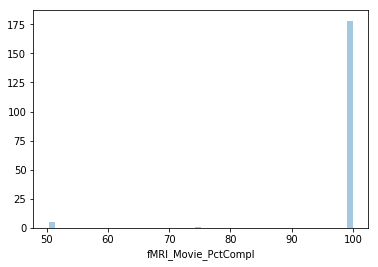

In [85]:
sb.distplot(df.fMRI_Movie_PctCompl, kde = False, bins = 50)
plt.show()

In [41]:
# how many subjects in this 100% bin?
sum(df.fMRI_Movie_PctCompl == 100)
# cool! 178 subjects with complete 7T movie data

178

In [33]:
# do they have MEG data?
np.sum(df.MEG_AnyData)


41

In [39]:
# Do they have complete resting MEG?
df.groupby(['MEG_AnyData'])['MEG_RS_Compl'].count()
# Yes

MEG_AnyData
False    143
True      41
Name: MEG_RS_Compl, dtype: int64

In [40]:
# Do they have complete 3T  task data?
sum(df['3T_tMRI_PctCompl'] == 100)
# cool 173 have complete 3T task data

173

In [11]:
# how many have complete 3T rest data
sum(df['3T_RS-fMRI_PctCompl'] == 100)

172

# Grab a slice of the df

In [47]:
# I want to look at the df filtered by just the subjects who have 7T movie, 3T rest, and MEG
df2 = df[(df.MEG_RS_Compl == True ) & (df.fMRI_Movie_PctCompl == 100) & (df['3T_RS-fMRI_PctCompl']  == 100)] 
# df2 = df[]

In [48]:
len(df2)
# There are 40 subjects with resting MEG, resting 3T fMRI, and 7T movie data

40

# Make a plot of memory behavioral data

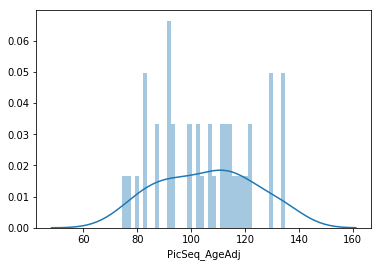

In [84]:
sb.distplot(df2.PicSeq_AgeAdj, kde = True, bins = 40)
plt.show()
# good spread of scores!

# Final Thoughts

In [ ]:
# The HCP collected a ton of data! If desired, I could examine the influence of  
# resting MEG and 3T RSfMRI dynamics on movie processing recorded at 7T. Kinda cool. 
# I was hoping to find QA or motion files for the fMRI data, but I didn't :( 